In [16]:
# this jupiter notebook is for using opensoundscape to visualize spectrograms from training data or original annotations 

In [17]:
import opensoundscape
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import librosa
import torch
import random
import sys

In [22]:
# load datasets
CC_2004_07 = pd.read_csv('modified_annotations/MasterSheet_modification.csv')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/opensoundscape/audio.py:328: UserWarning: audio object has zero samples
  warnings.warn(error_msg)


No audio samples found for file: /Users/luisbarajas/Desktop/Projects/Course_Projects/pstat_197/master_wav_sonobuoy/CC0407-SB10-040717-223000.wav


/var/folders/yl/19skr8bd7pd535q5j4l6s3k00000gn/T/ipykernel_61902/2720276553.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


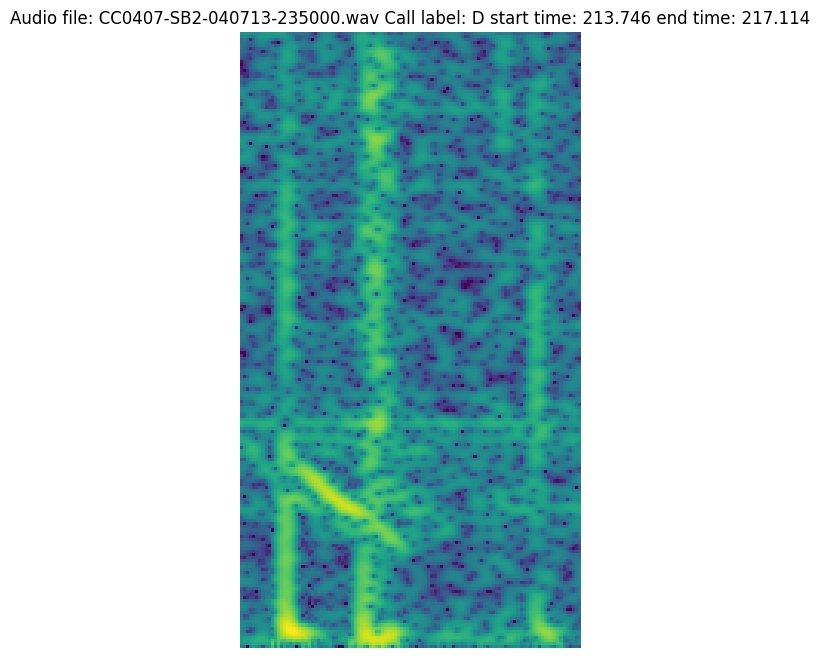

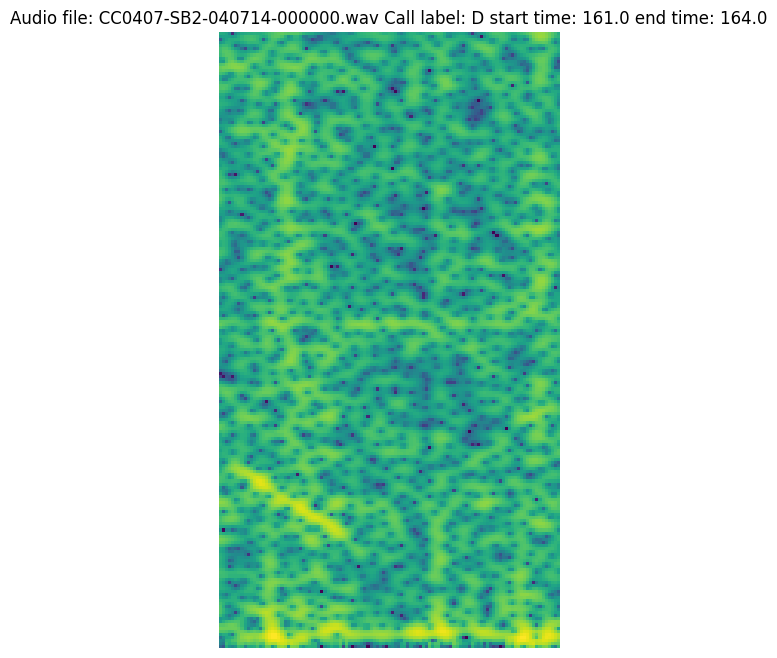

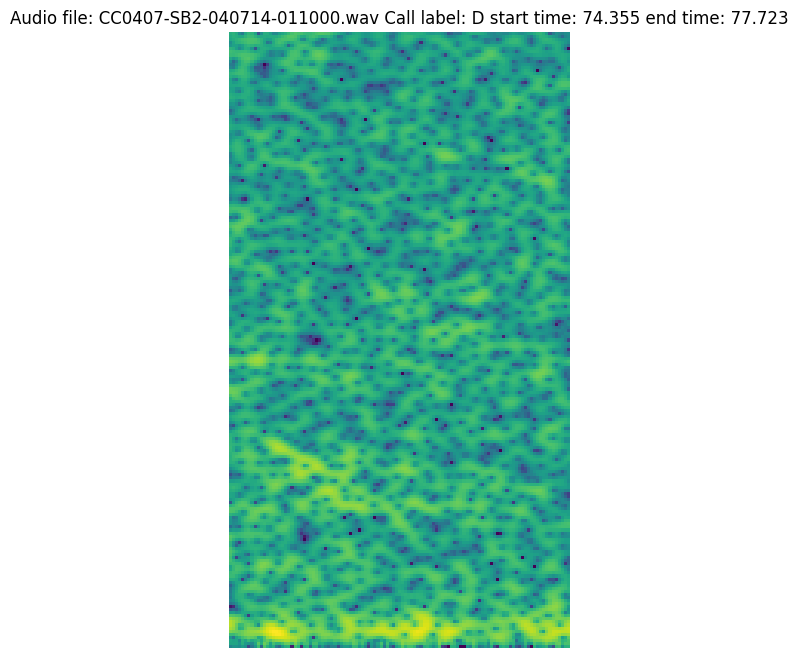

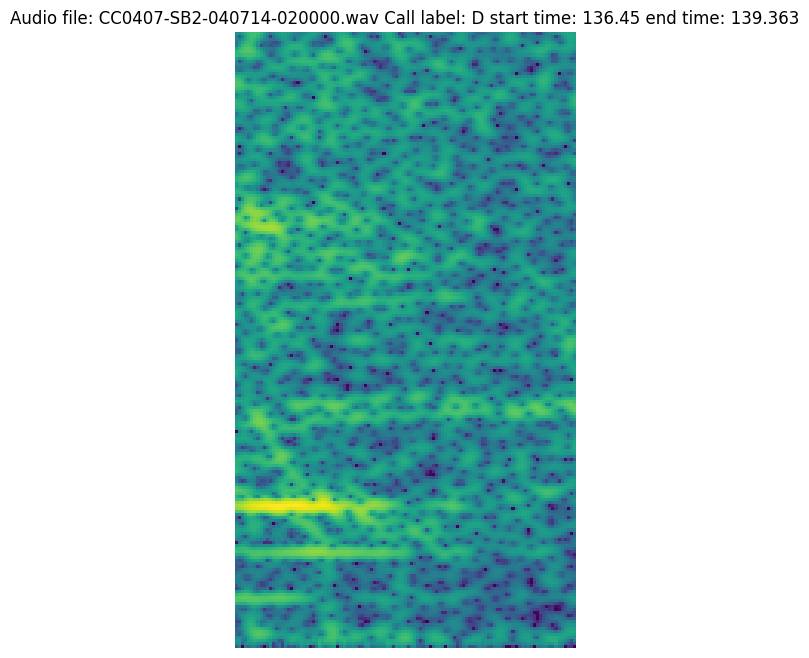

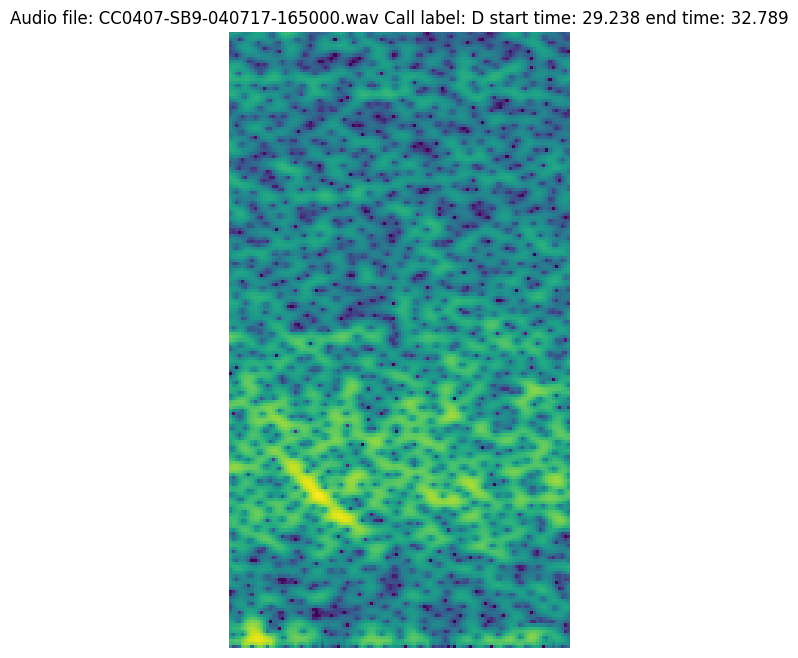

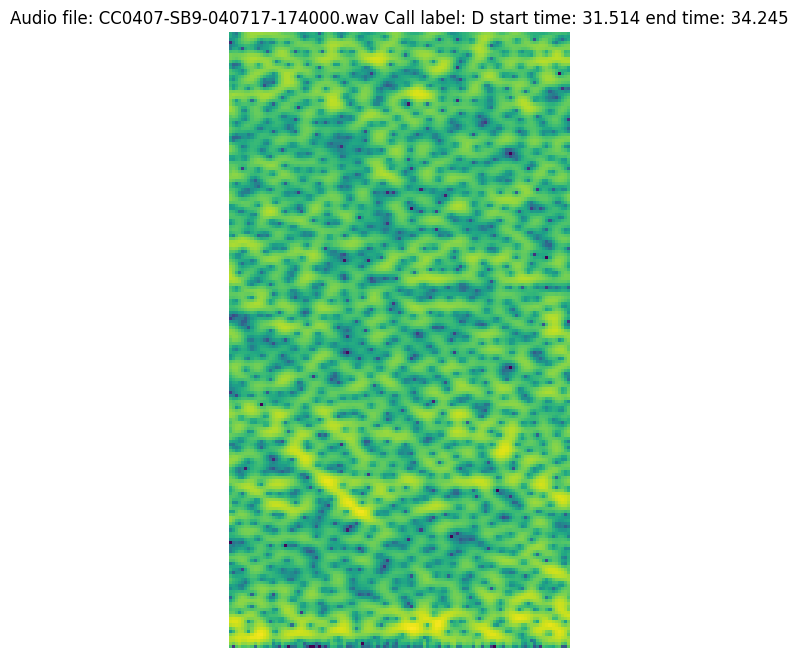

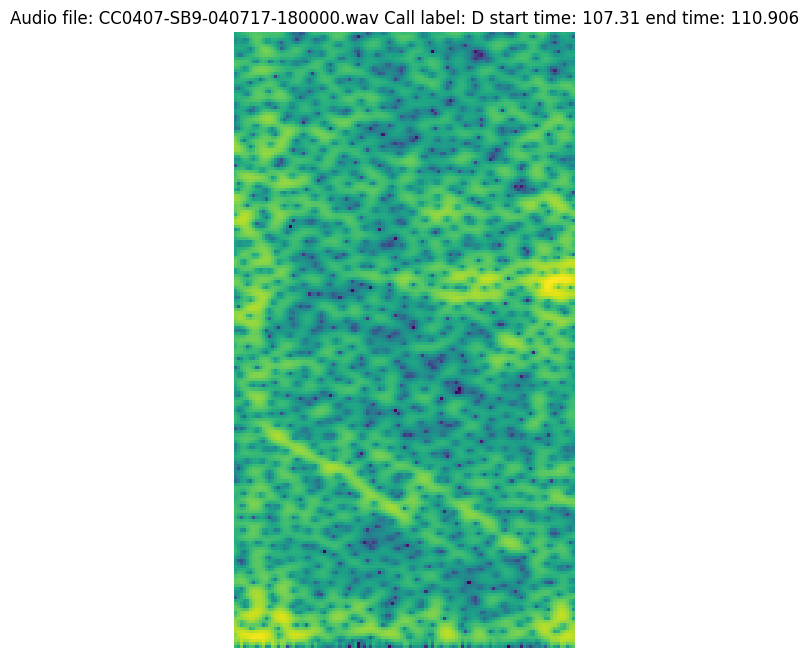

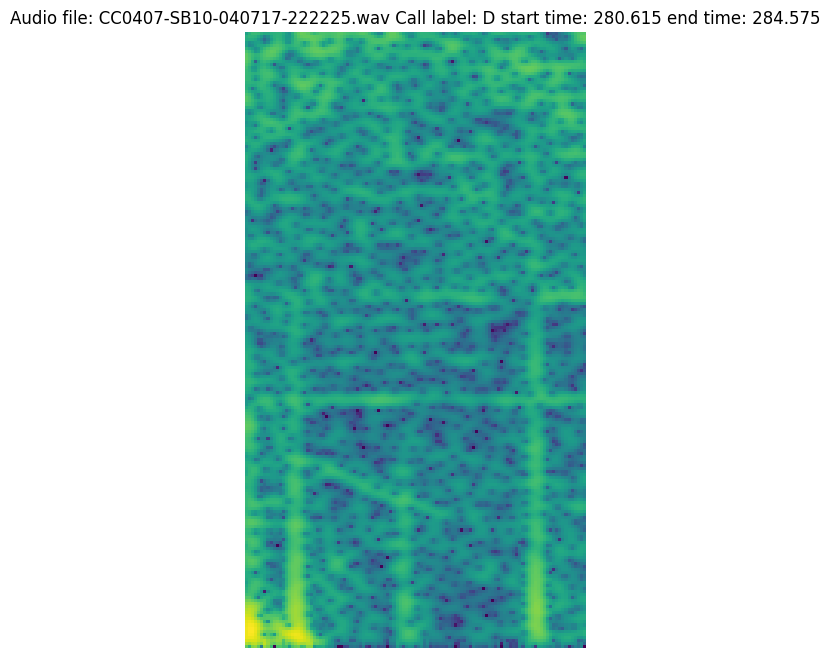

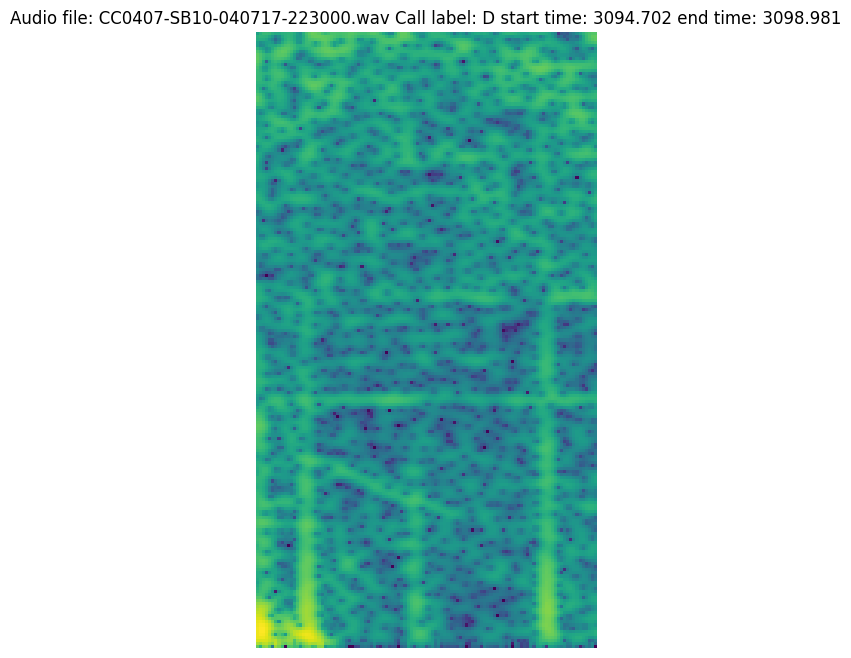

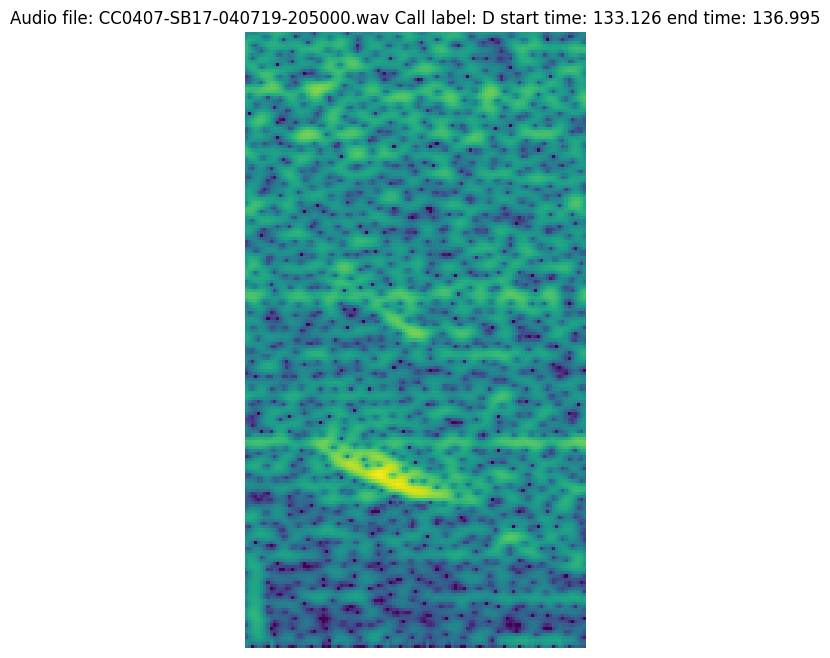

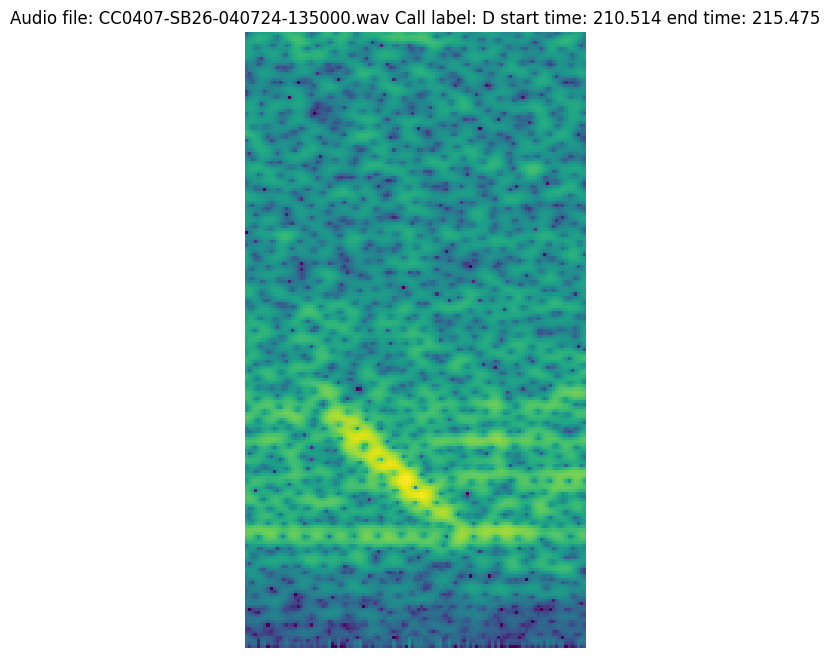

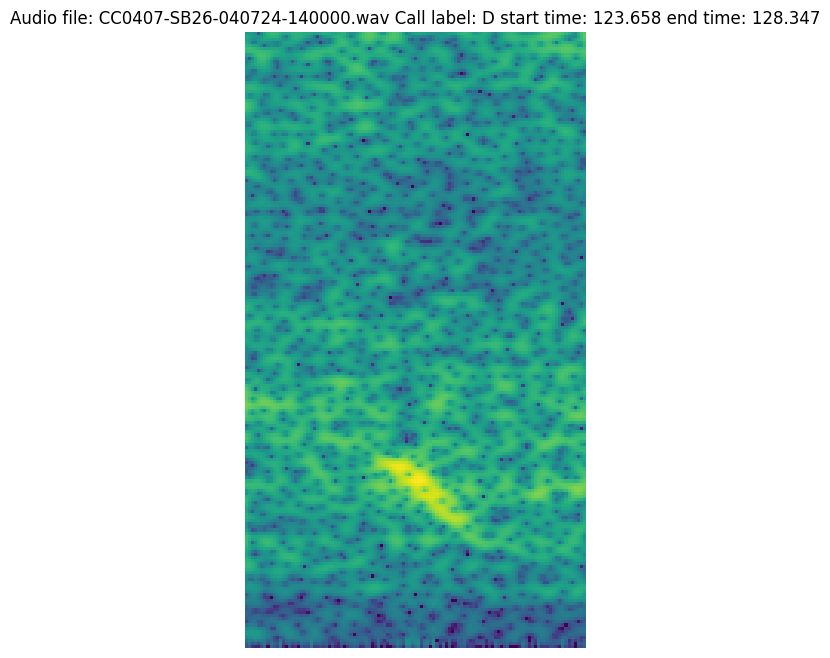

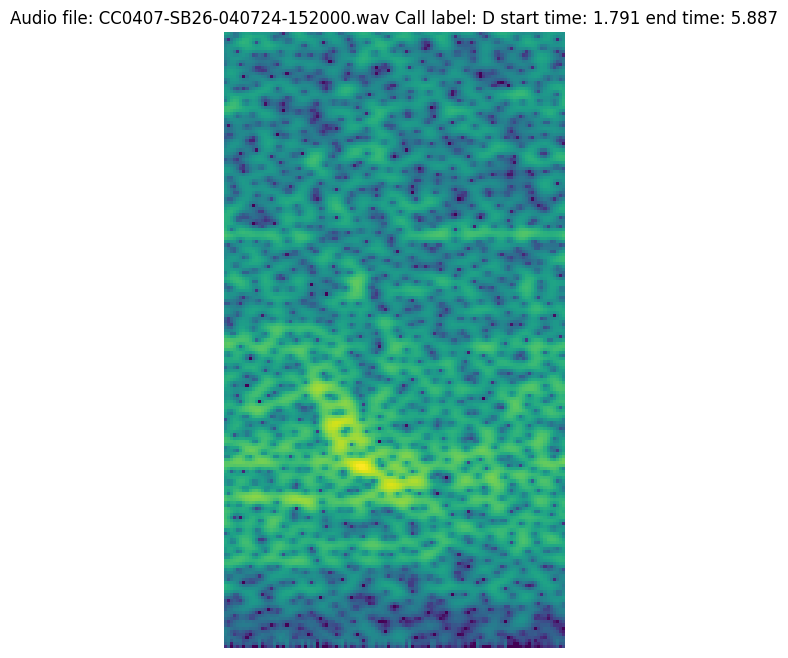

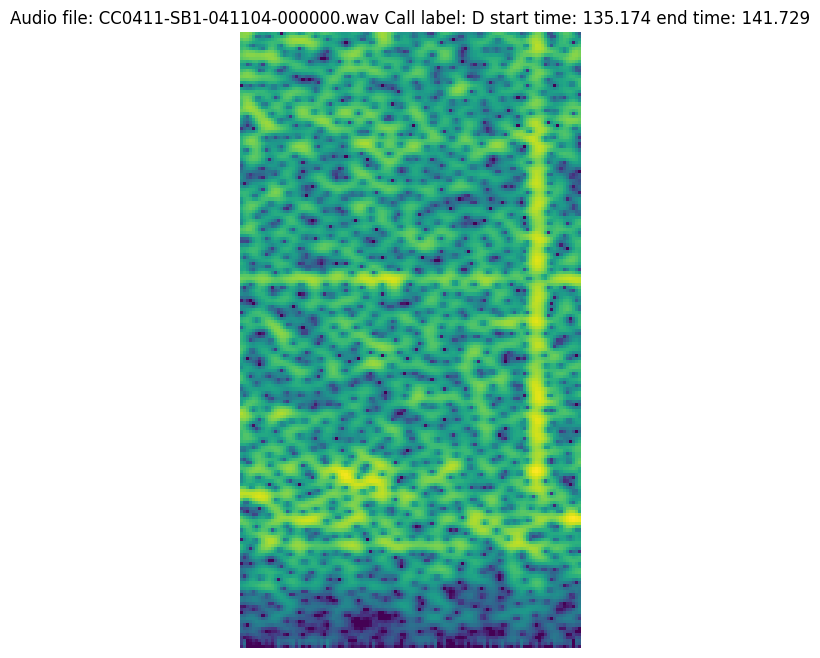

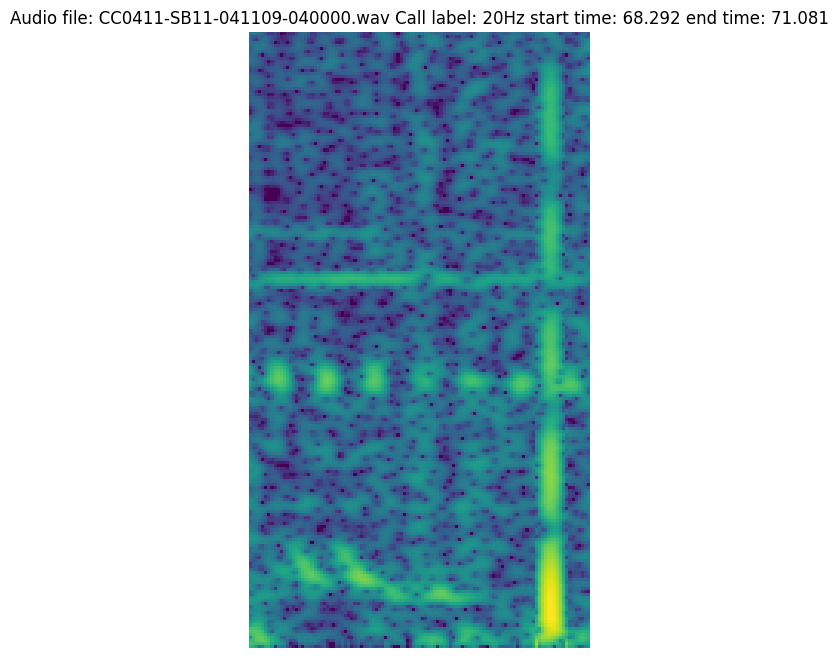

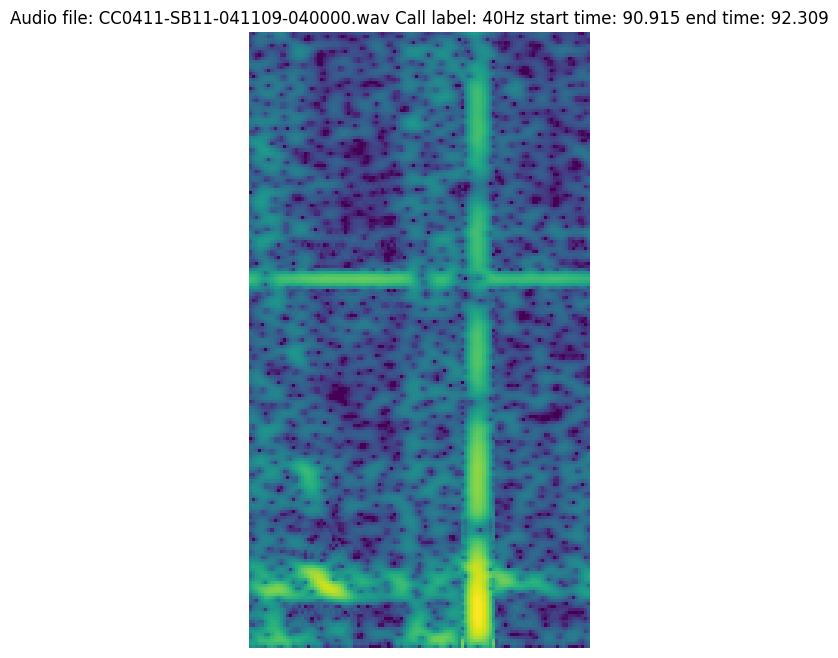

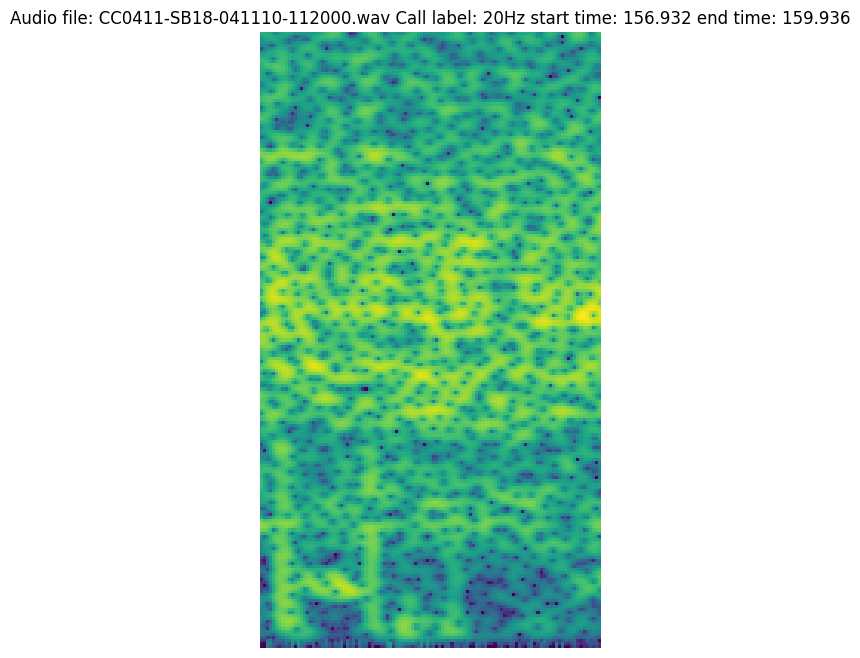

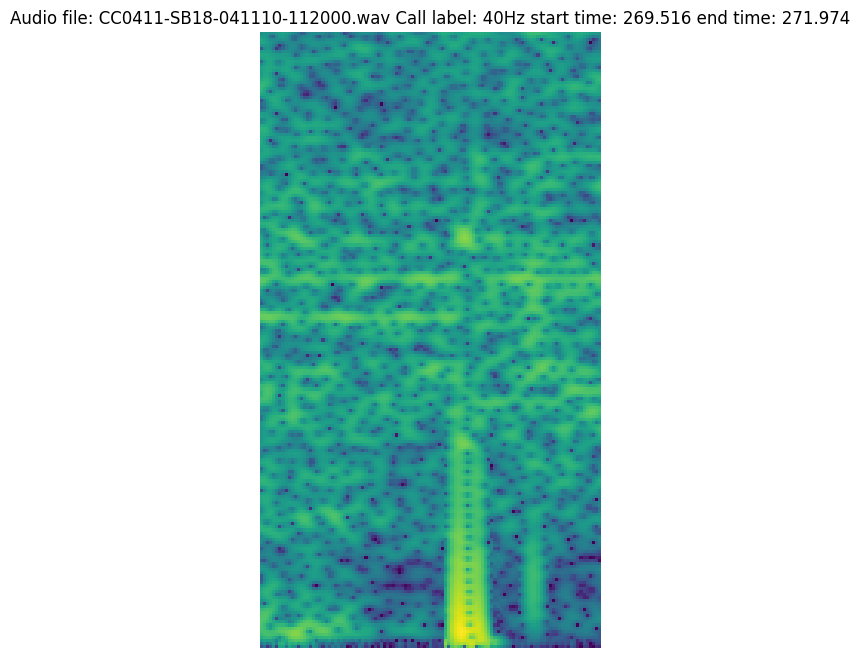

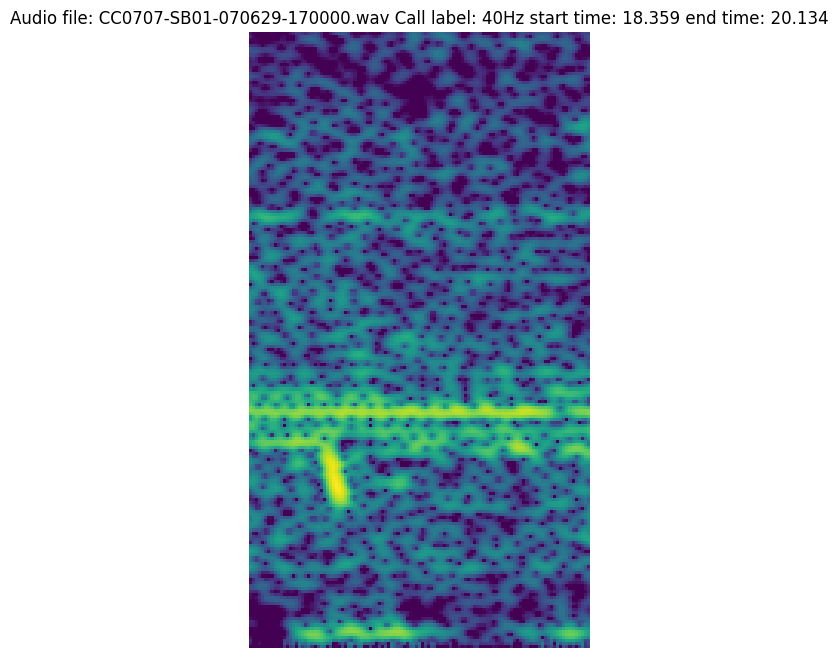

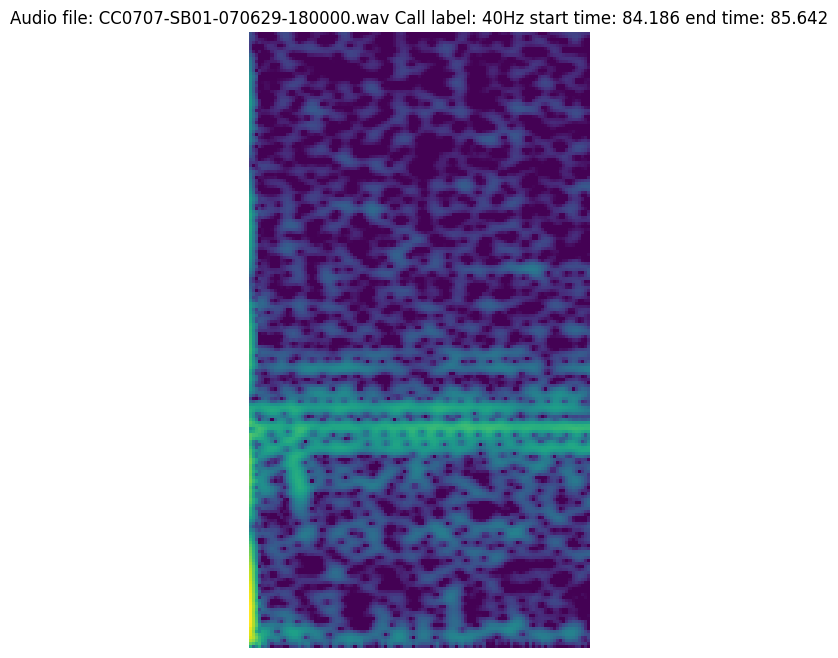

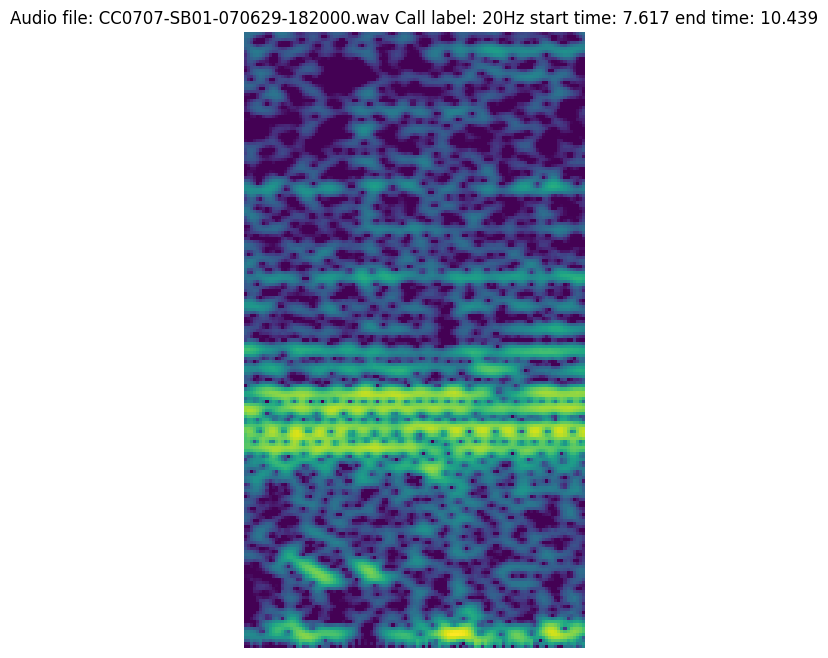

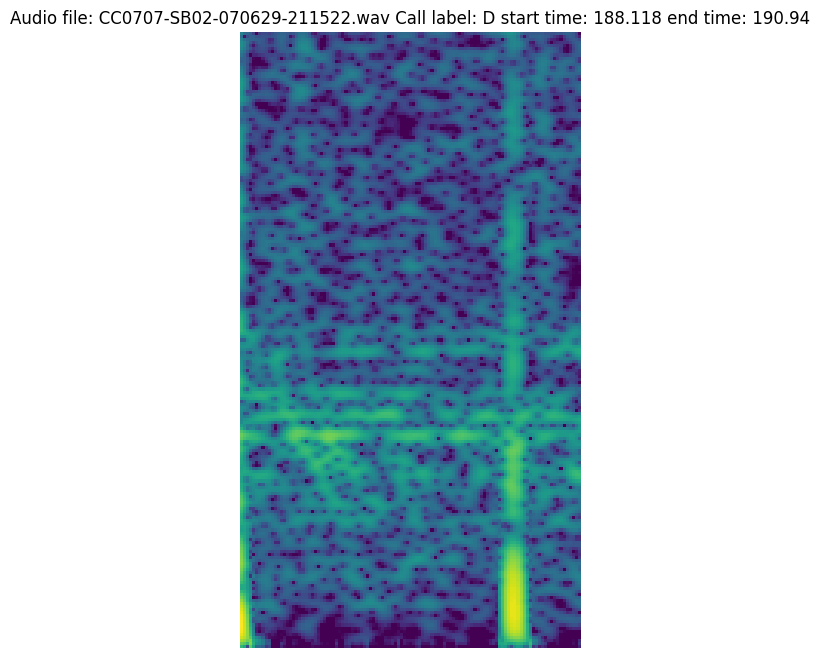

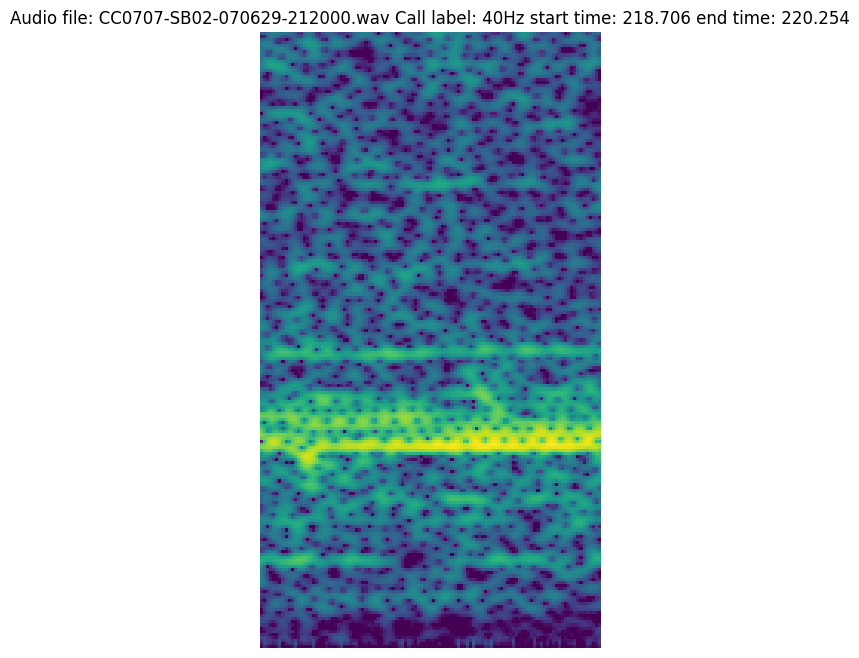

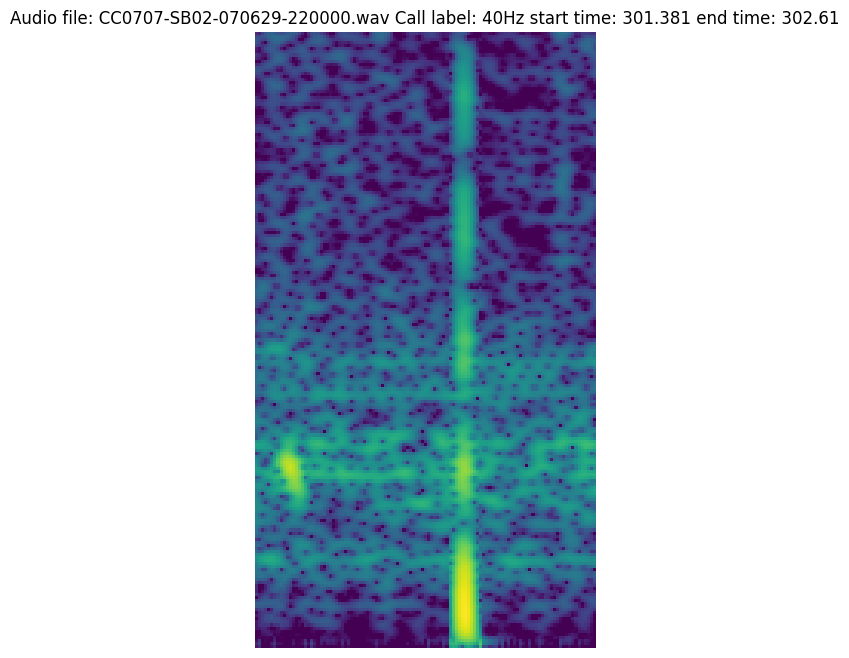

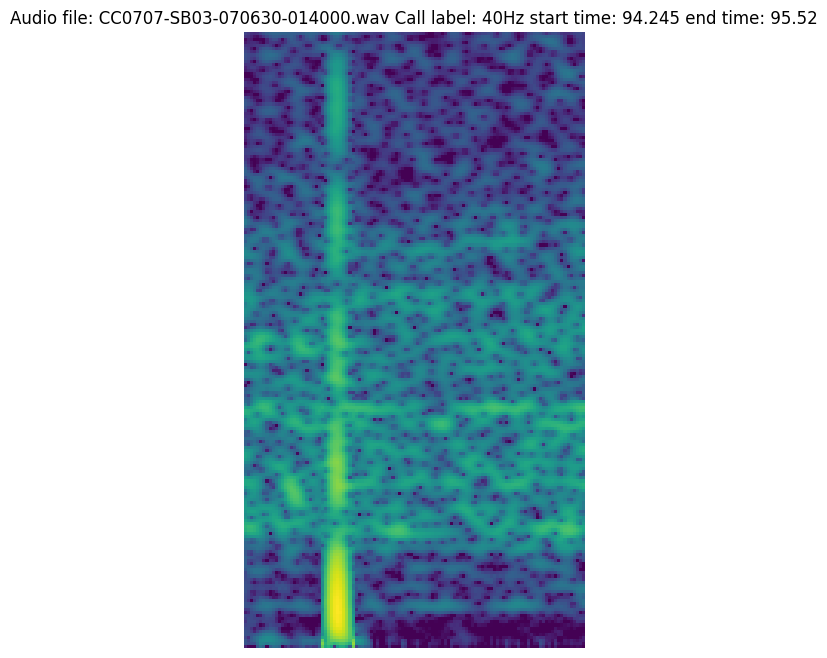

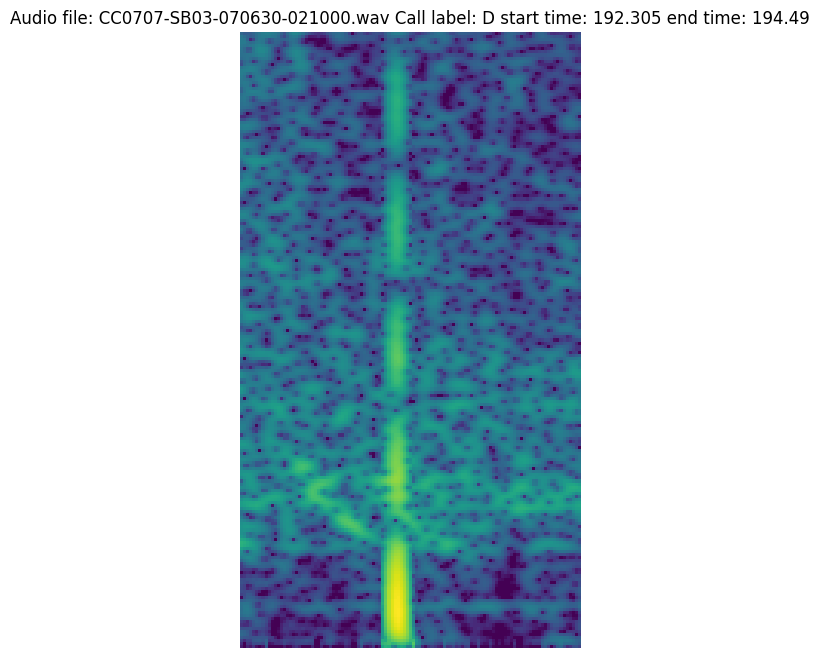

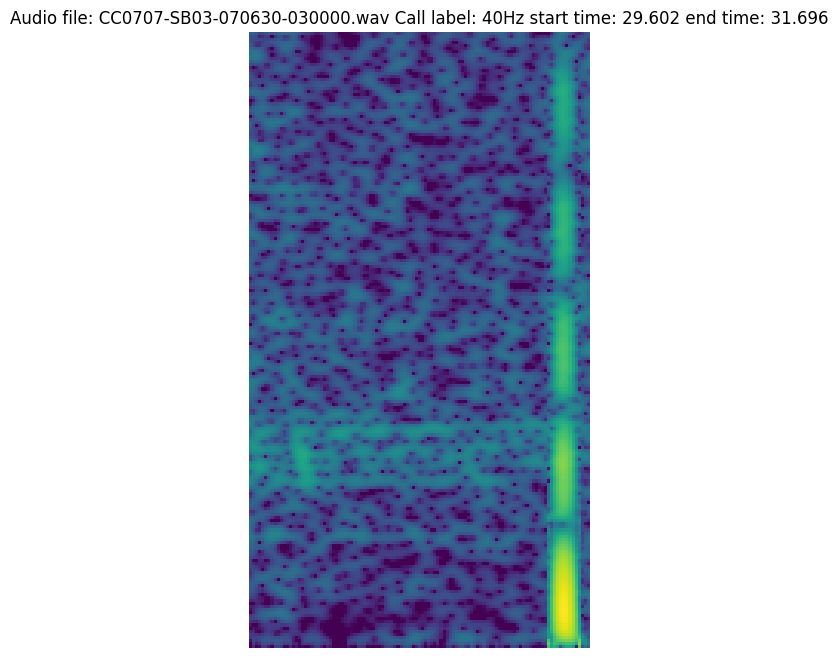

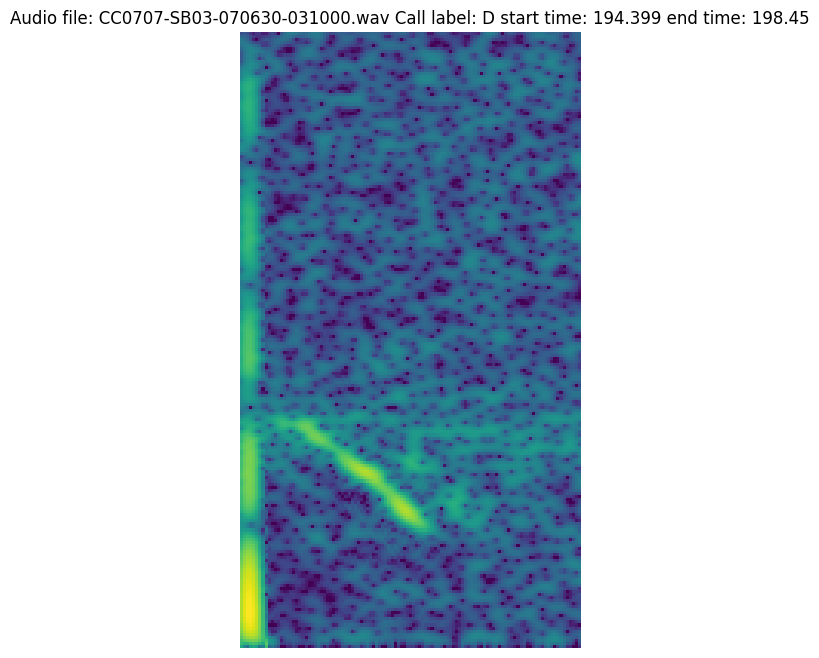

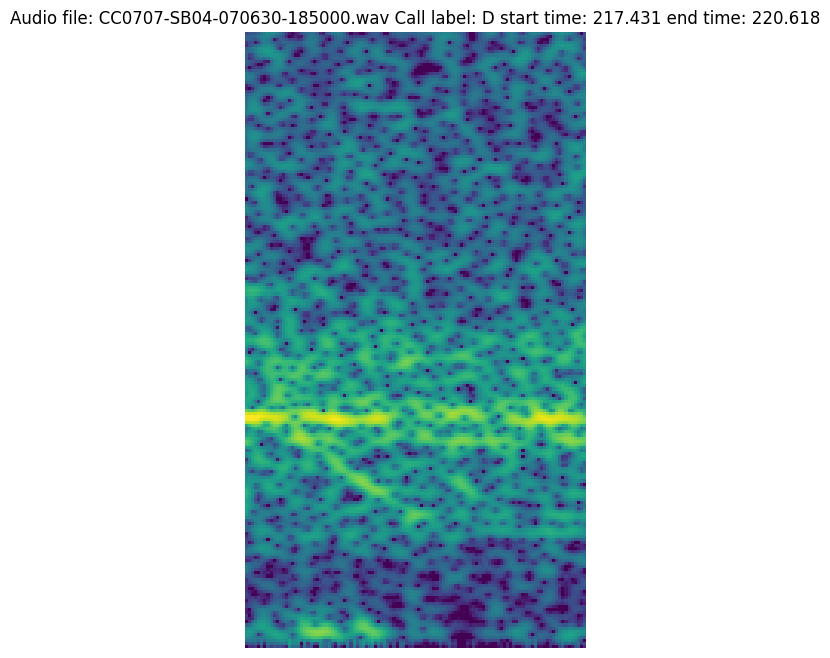

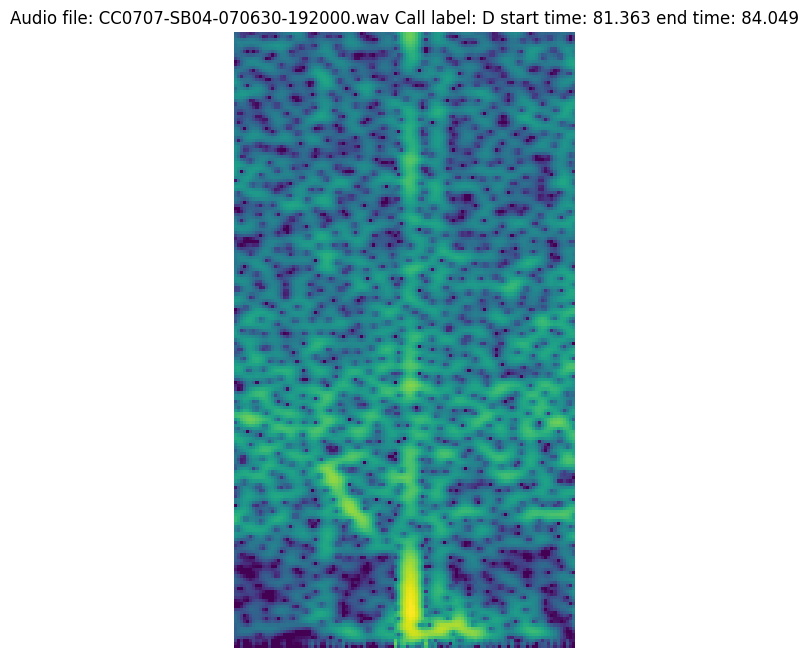

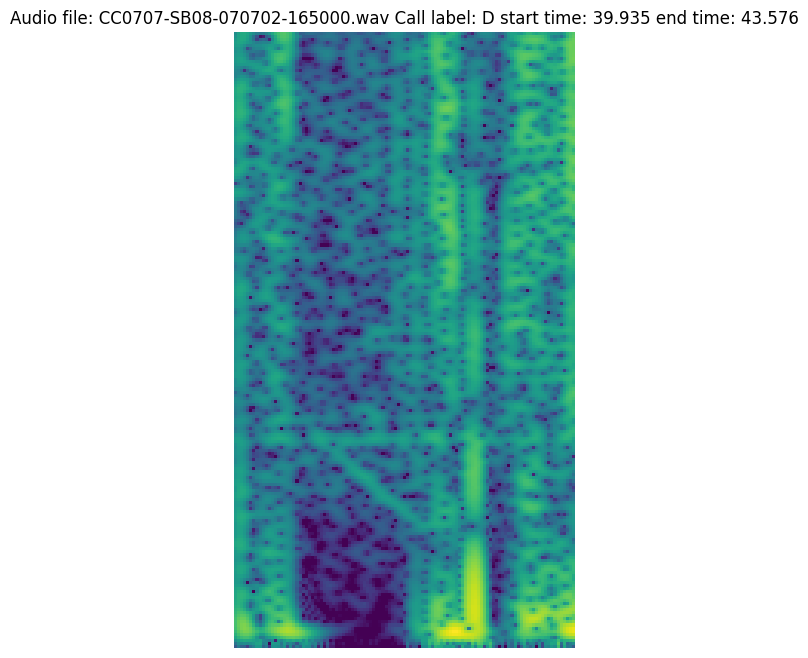

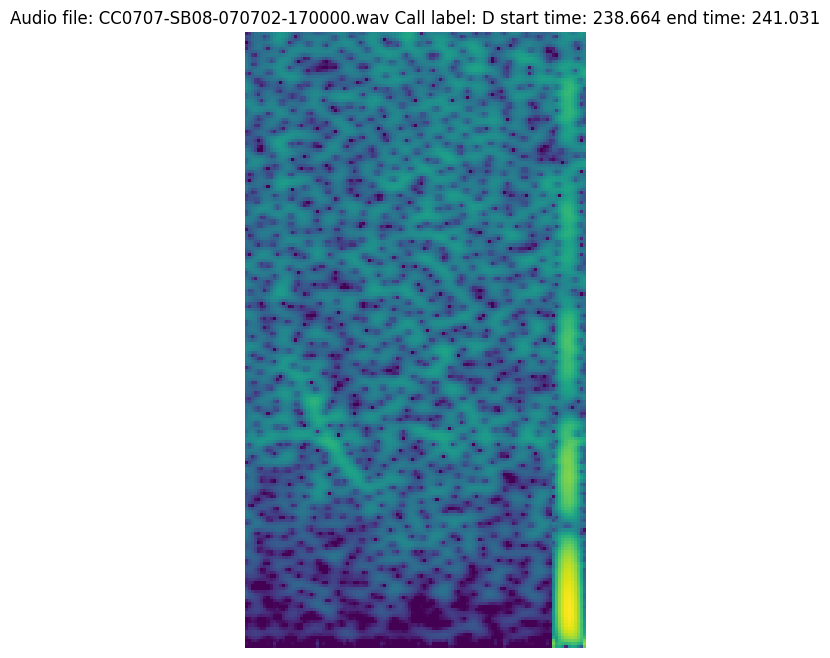

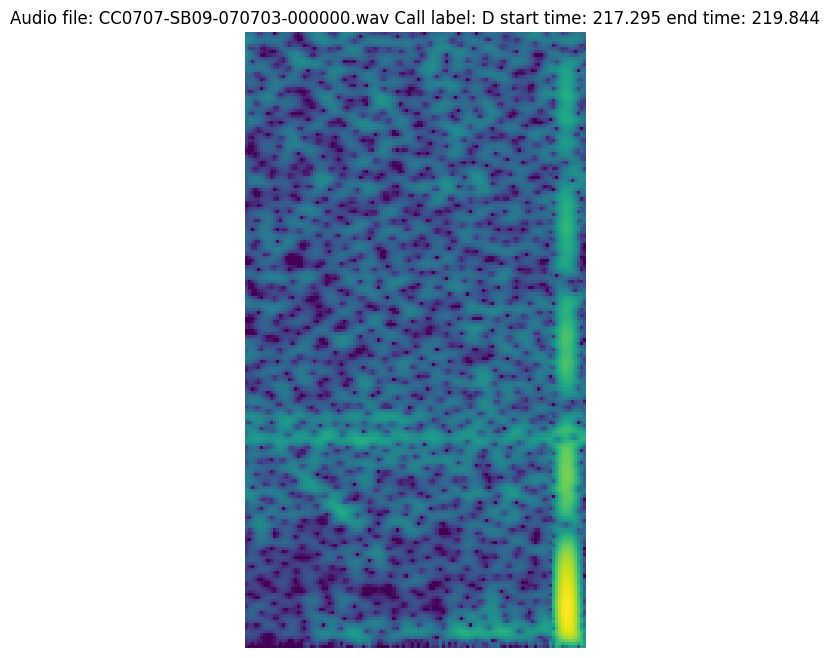

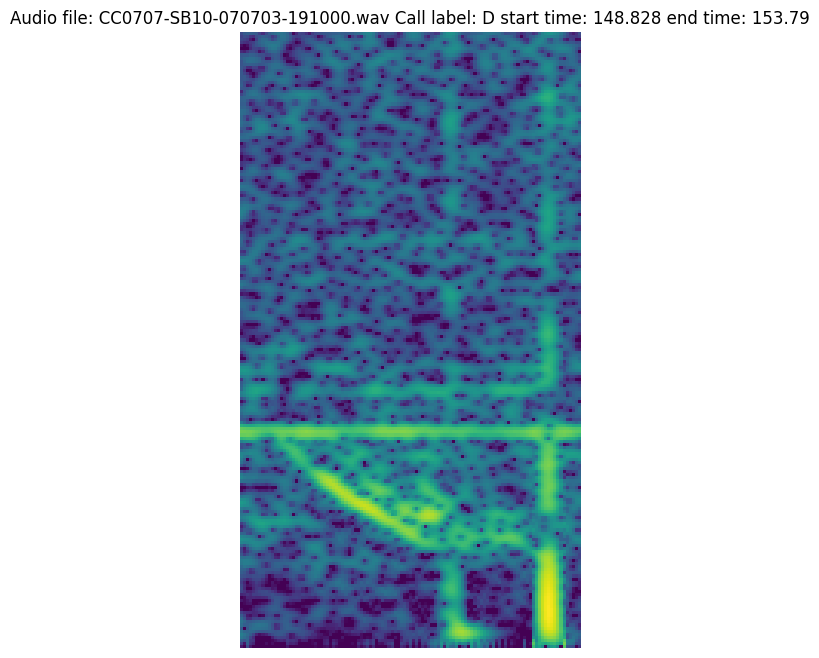

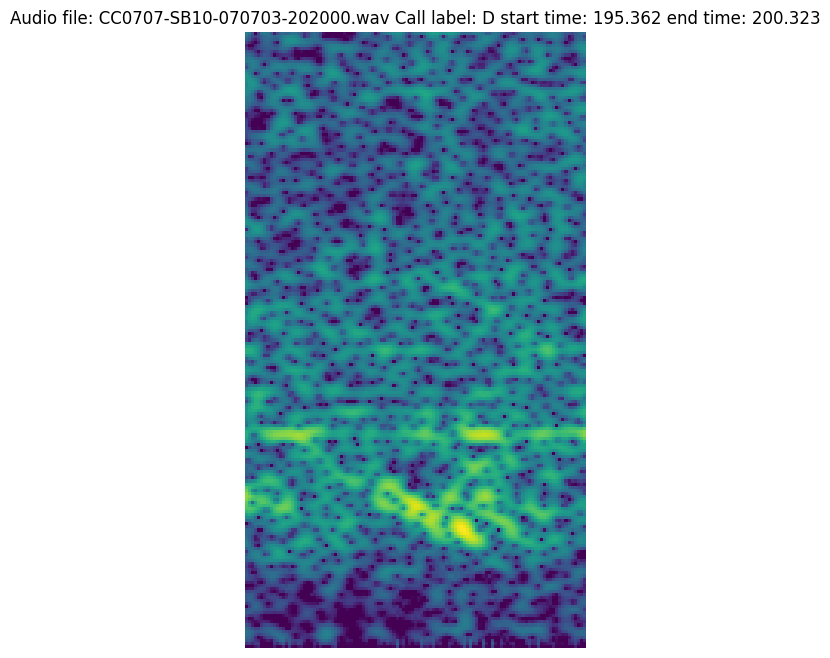

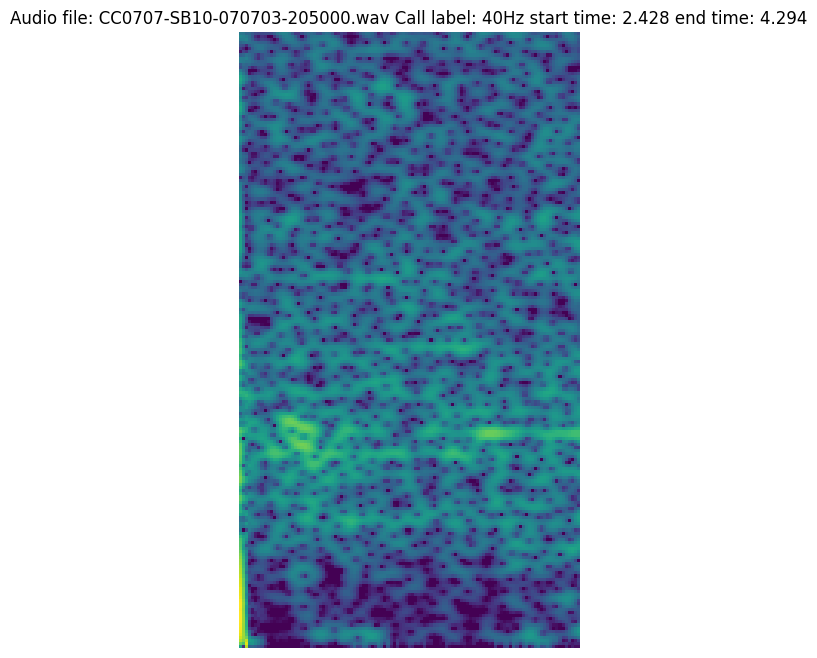

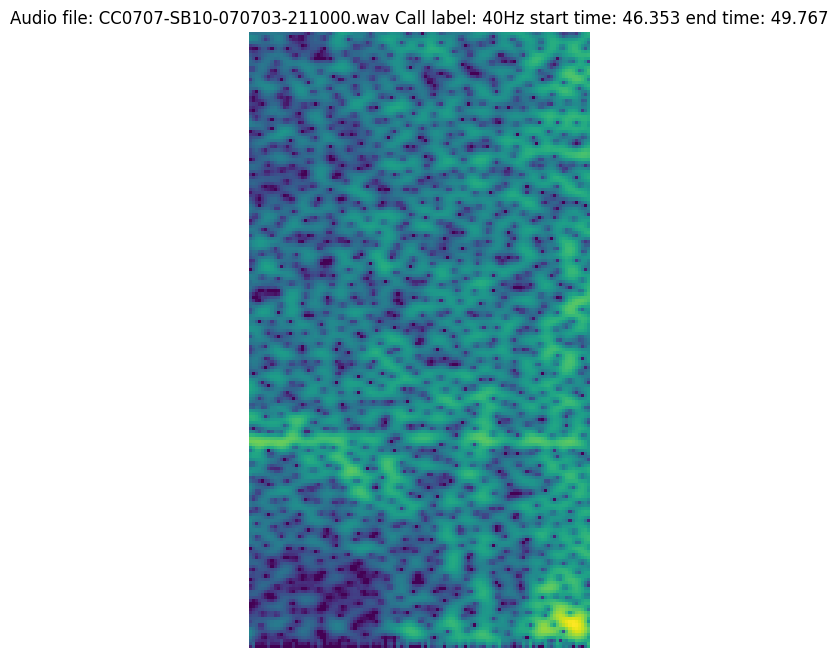

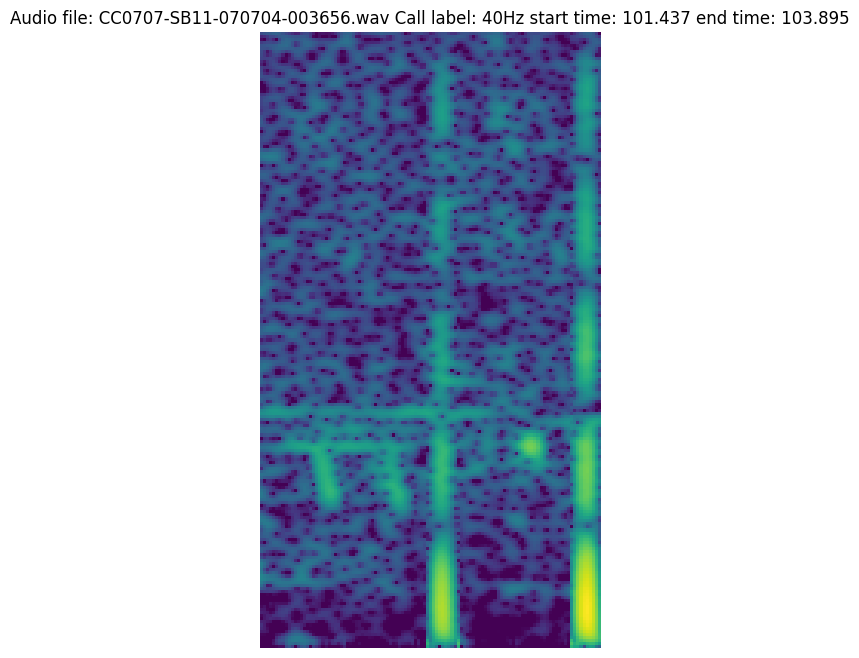

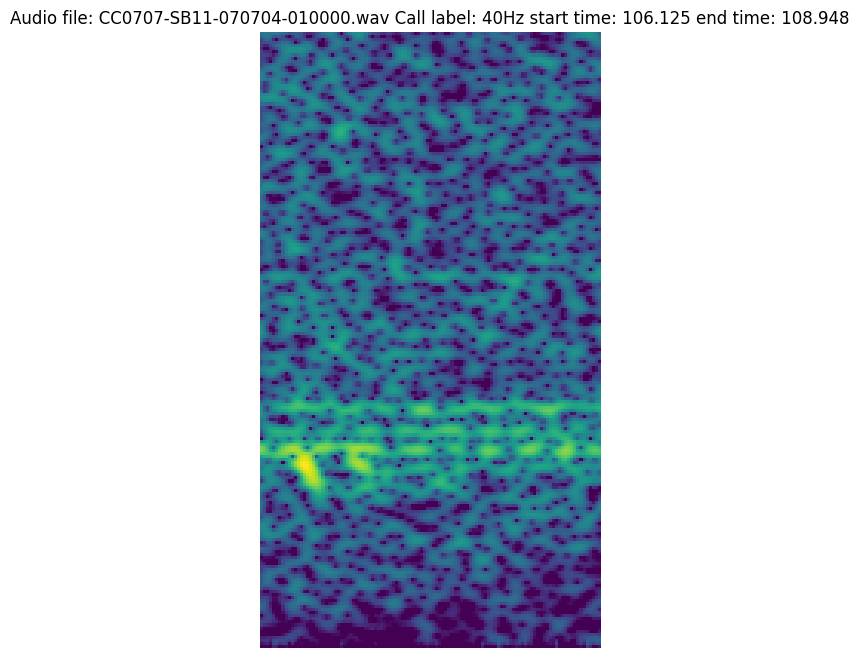

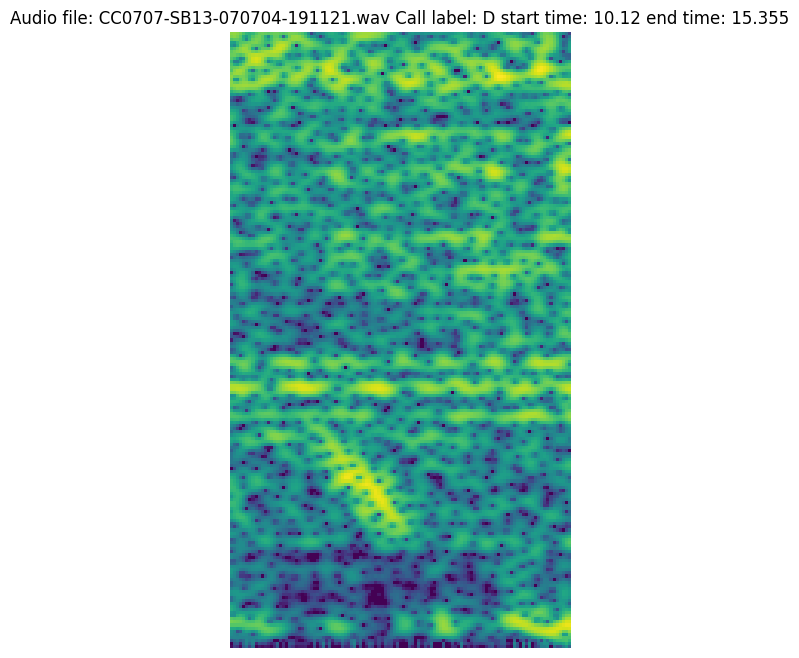

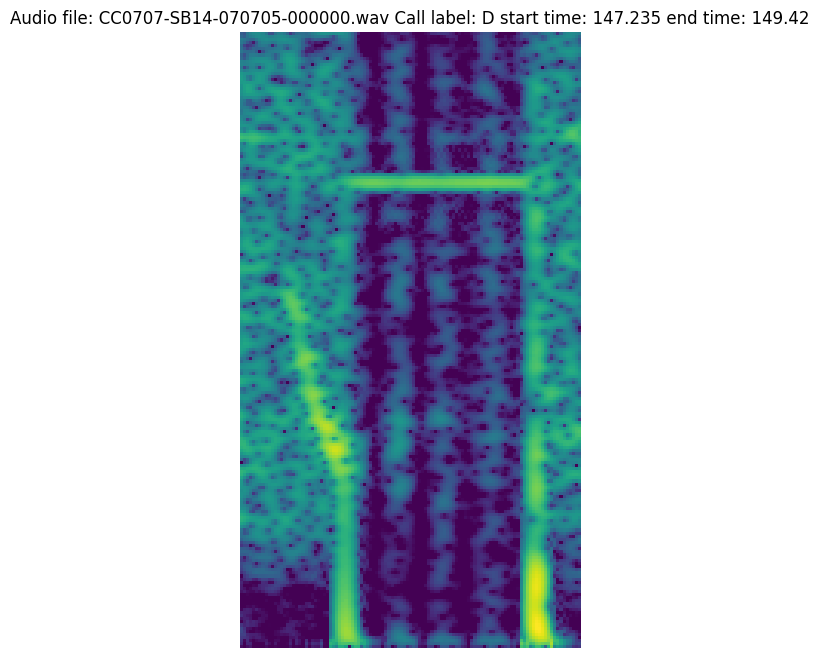

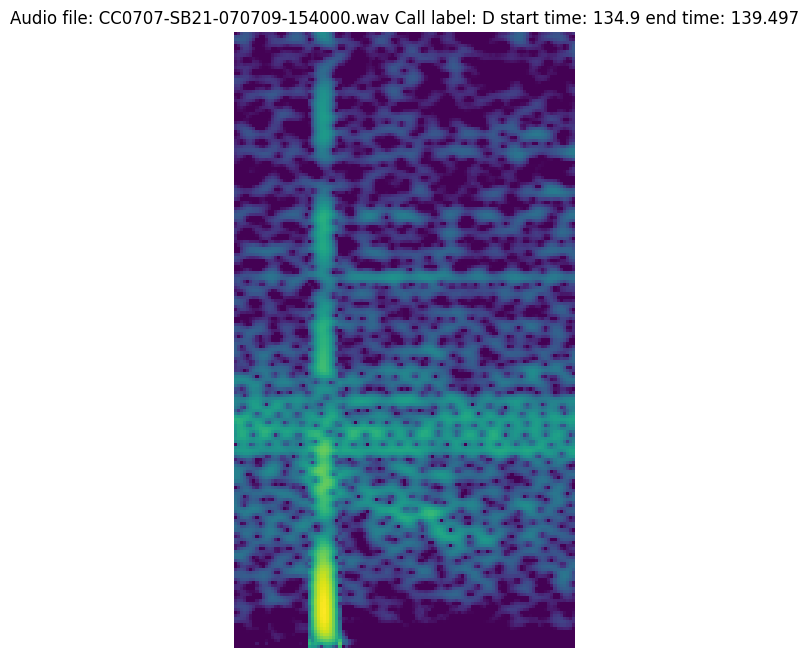

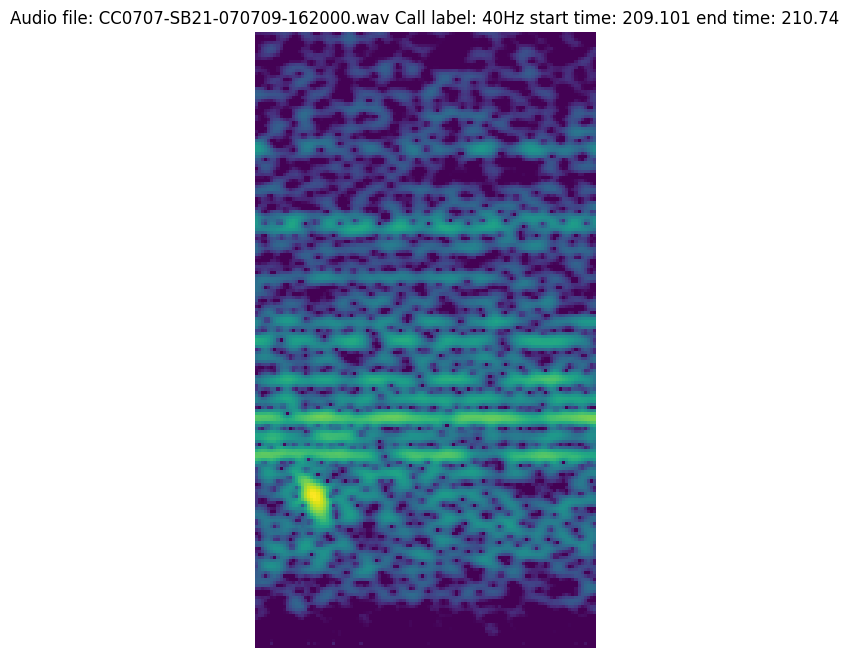

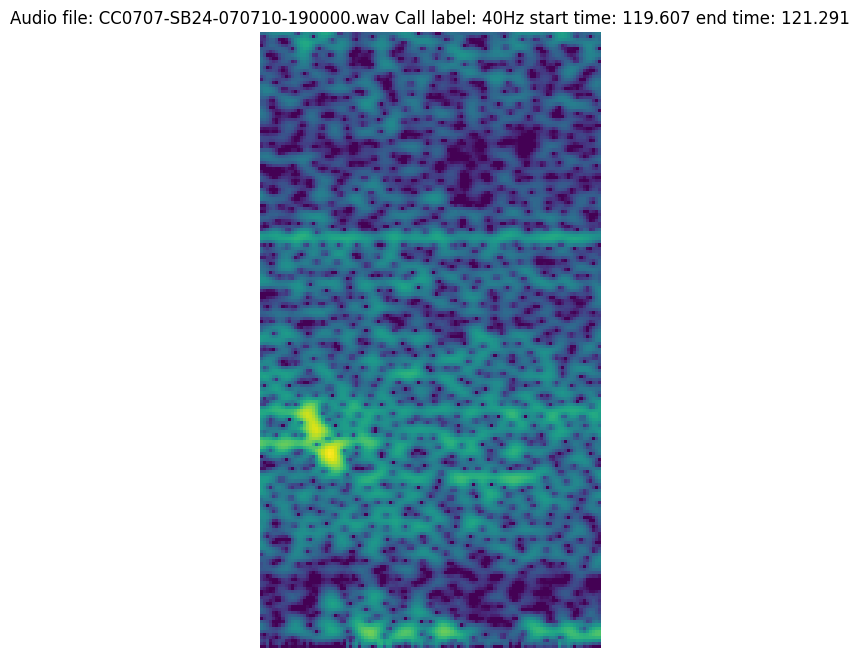

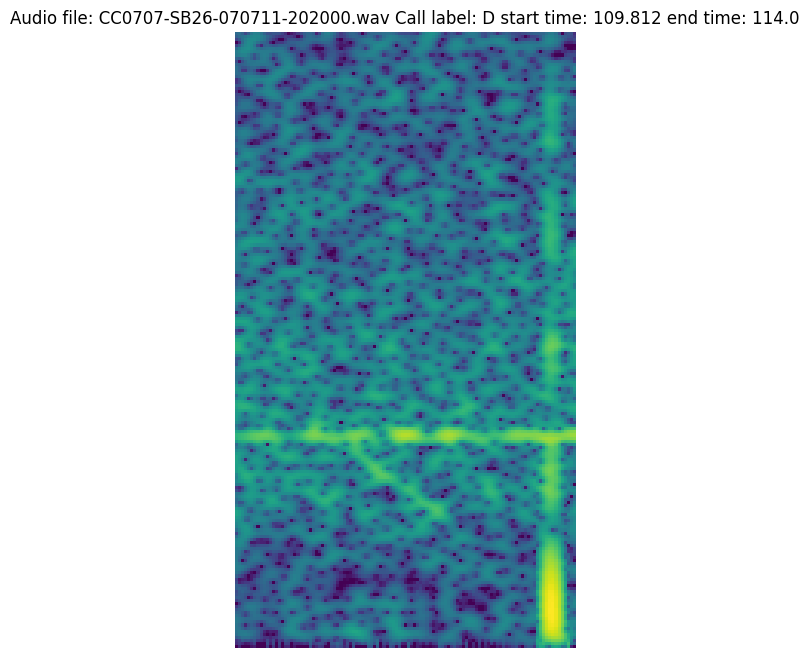

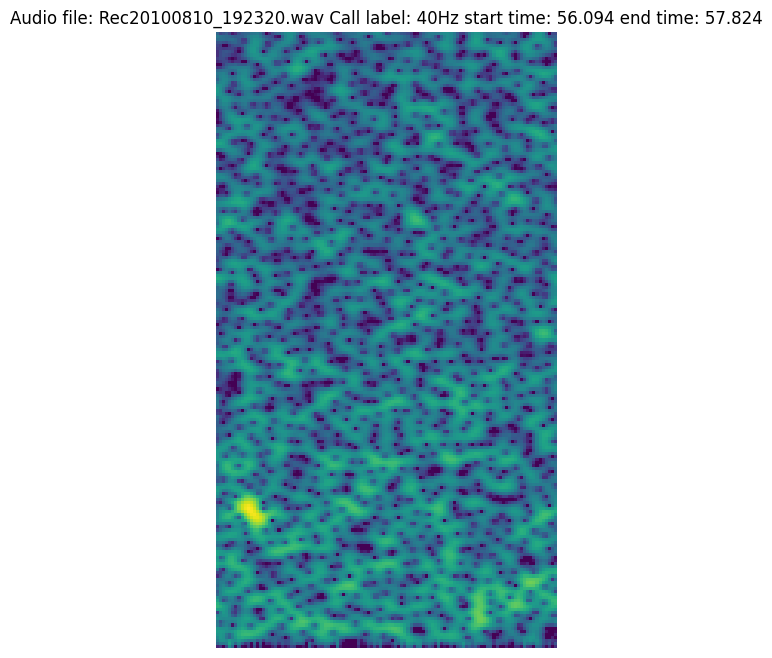

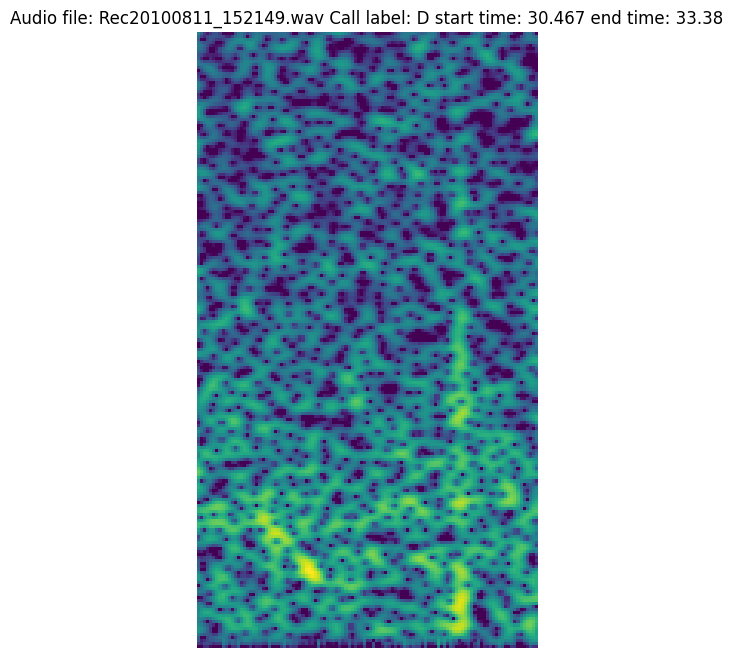

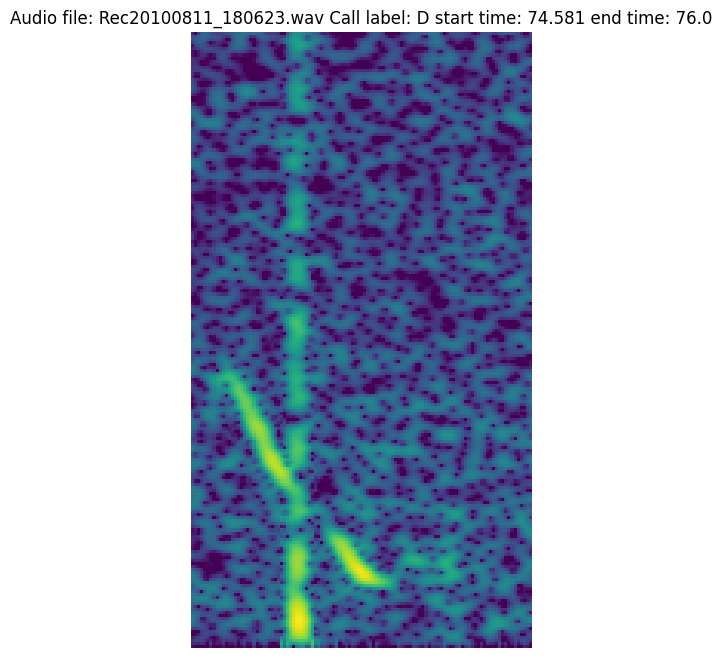

In [23]:
# plot spectrograms from each deployment
# CalCOFI-2004-07
for index, row in CC_2004_07.iterrows():

    audio_file_name = os.path.split(row['audio_file'])[1]
    audio = opensoundscape.Audio.from_file(row['audio_file'], sample_rate=48000, offset=row['start_time'], duration=6)

    if audio.samples.shape[0] > 0:  # Assuming audio.samples returns a numpy array of audio samples
        spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                                     overlap_samples=21600, fft_size=48000, 
                                                     scaling='density')
        spec_image = spec.bandpass(0, 200).to_image()
    #spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                             #overlap_samples=21600, fft_size=48000, 
                                             #scaling='density')

    #spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                                                #overlap_samples=21600, fft_size=48000, 
                                                                #decibel_limits=(-100, 100), scaling='density')
    else:
        print(f"No audio samples found for file: {row['audio_file']}")

    #spec_image = spec.bandpass(0, 200).to_image()
    plt.figure(figsize=(12, 8))
    plt.imshow(spec_image)
    plt.title(f'Audio file: {audio_file_name} Call label: {row["annotation"]} start time: {row["start_time"]} end time: {row["end_time"]}')
    plt.axis('off')